# Setup librairies

In [230]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Sommaire

1. collect de donnée
2. netoyage et preparation des données
3. objectif de la prediction
4. selection de l’algo et du model
5. entrainement du modele
6. deploiement du modele
7. evaluation et enjeux


# Collect de donnée brut

In [231]:
# Load the dataset
file_path = './tomato_disease.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(10)

,Unnamed: 0,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,0,5.496714,54.630888,24.798711,63.891805,Diseased
1,1,4.861736,59.547083,23.849267,57.244071,Diseased
2,2,5.647689,43.007162,22.119261,55.909006,Healthy
3,3,6.523030,52.814846,20.706126,59.983128,Diseased
4,4,4.765847,46.746787,23.396447,59.149077,Diseased
5,5,4.765863,47.564373,22.786971,57.733860,Diseased
6,6,6.579213,47.038030,23.790386,63.481937,Diseased
7,7,5.767435,45.680046,23.270344,64.776526,Diseased
8,8,4.530526,50.242608,24.099105,60.442034,Diseased
9,9,5.542560,45.845249,20.929530,67.387650,Diseased


In [232]:
print(type(df))
len(df.columns)

<class 'pandas.core.frame.DataFrame'>


6

# Nettoyage et preparation des données

In [233]:
# Résumé des informations du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        500 non-null    int64  
 1   Leaf_Spot_Size    500 non-null    float64
 2   Leaf_Color_Index  500 non-null    float64
 3   Temperature       500 non-null    float64
 4   Humidity          500 non-null    float64
 5   Disease           500 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB


## Nettoyage

In [234]:
#df.summary()
df = df.drop(df.columns[0], axis=1)

print(df.head())
len(df.columns)

   Leaf_Spot_Size  Leaf_Color_Index  Temperature   Humidity   Disease
0        5.496714         54.630888    24.798711  63.891805  Diseased
1        4.861736         59.547083    23.849267  57.244071  Diseased
2        5.647689         43.007162    22.119261  55.909006   Healthy
3        6.523030         52.814846    20.706126  59.983128  Diseased
4        4.765847         46.746787    23.396447  59.149077  Diseased


5

## Exploration

In [235]:
df.describe()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity
count,500.000000,500.000000,500.000000,500.000000
mean,5.006838,50.159131,22.216969,60.165940
std,0.981253,4.889986,2.020493,4.920331
min,1.758733,36.515567,16.207489,45.298057
25%,4.299693,47.023541,20.795141,56.940319
50%,5.012797,50.142658,22.239612,59.955433
75%,5.636783,53.256211,23.509477,63.498847
max,8.852731,63.161910,27.203366,75.965538


## transformation de données

### Imputation

In [236]:
# Vérifier si n'importe quelle colonne contient des valeurs manquantes
df.isnull().any()

Leaf_Spot_Size      False
Leaf_Color_Index    False
Temperature         False
Humidity            False
Disease             False
dtype: bool

Pas de cellules vide donc pas d'imputeur à utiliser

### Encoder

recheck label encoder (rediff sem6 part2 1:08)

In [237]:
# Label Encoding
# df['Disease'] = df['Disease'].map({'Diseased': 1, 'Healthy': 0})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

df.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,5.496714,54.630888,24.798711,63.891805,0
1,4.861736,59.547083,23.849267,57.244071,0
2,5.647689,43.007162,22.119261,55.909006,1
3,6.523030,52.814846,20.706126,59.983128,0
4,4.765847,46.746787,23.396447,59.149077,0


* pas besoin de discretiser des variables continue (regrouper par categorie des "range" de variable continue)
* pas besoin de créer des variable dérivées

### Normalisation

In [238]:
from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(df)
transformer.transform(df)
df.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,5.496714,54.630888,24.798711,63.891805,0
1,4.861736,59.547083,23.849267,57.244071,0
2,5.647689,43.007162,22.119261,55.909006,1
3,6.523030,52.814846,20.706126,59.983128,0
4,4.765847,46.746787,23.396447,59.149077,0


## Preparation des données

### Séparation features et label

Enlever la colonne Disease pour séparer "features" et "label" dans le train pour entrainer le model et on le met dans le test pour tester le model

In [239]:
y = df['Disease']
X = df.drop(['Disease'], axis=1)

In [240]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Disease, dtype: int64

In [241]:
X.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity
0,5.496714,54.630888,24.798711,63.891805
1,4.861736,59.547083,23.849267,57.244071
2,5.647689,43.007162,22.119261,55.909006
3,6.523030,52.814846,20.706126,59.983128
4,4.765847,46.746787,23.396447,59.149077


In [242]:
len(X.columns)

4

### train test split

In [243]:
from sklearn.model_selection import train_test_split

# je divise les données entre donnée d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

il faudra peut etre enlever les colonnes qui font du bruit

# Objectif de la prediction

classification: predire si une plante de tomate est malade en fonction de différents parametre (taille et couleur de la feuille, temperature et humidité)

projet metier: permet de savoir si une plante tombe plus souvent malade suivant un climat en particulier (temperature et humidité)

# Selection de l'algorithme et du model

## Algorithme

In [244]:
from sklearn.svm import SVC

# Créer un modèle SVM avec un noyau linéaire (optionnel : vous pouvez aussi utiliser 'rbf' ou d'autres noyaux)
modelSVM = SVC(kernel='linear', random_state=42)

# Entraîner le modèle
modelSVM.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = modelSVM.predict(X_test)

In [245]:
from sklearn.metrics import accuracy_score, classification_report

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Afficher un rapport détaillé sur la classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        82
           1       0.00      0.00      0.00        18

    accuracy                           0.82       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.67      0.82      0.74       100



C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

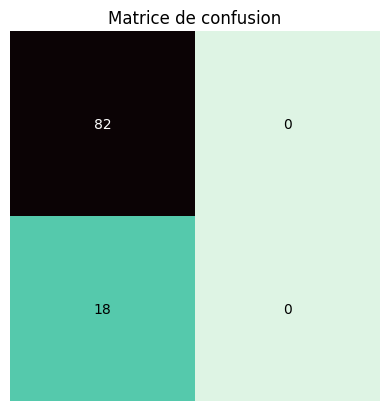

In [246]:
from sklearn.metrics import confusion_matrix
from seaborn import color_palette

cf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{cf_matrix}")

fig, ax = plt.subplots()
im = ax.imshow(cf_matrix,cmap='mako_r')
for i in range(len(cf_matrix)):
    for j in range(len(cf_matrix[i])):
        col = 'white'
        if cf_matrix[i,j]<(cf_matrix.max()/4):
            col = 'black'
        ax.text(j, i, cf_matrix[i, j],ha="center", va="center", color=col)
ax.set_title("Matrice de confusion")
plt.axis('off')
plt.show()


## Model

In [247]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
modelRFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
modelRFC.fit(X_train, y_train)

# Prédiction
y_pred = modelRFC.predict(X_test)


In [248]:
# PAS BESOIN DE PIPELINE DANS LE PROJET1 ????
# 
# # creation du pipeline
from sklearn.pipeline import Pipeline

# my_pipeline = Pipeline(
#     steps=[
# #        ('preprocessor', preprocessor),
#         ('model', model)
#     ]
# )

In [249]:

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9800


### Precision

In [250]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}")


Precision: 1.0


In [251]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall}")


Recall: 0.8888888888888888


In [252]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1}")


F1 Score: 0.9411764705882353


## Details erreur du model avec matrice de confusion

Pour visualiser les erreurs de classification et voir quelles classes sont souvent confondues. Utile pour les problèmes multiclasse.

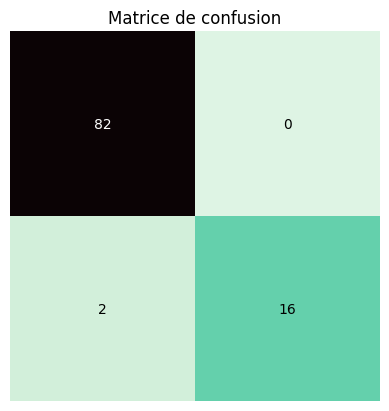

In [253]:
from sklearn.metrics import confusion_matrix
from seaborn import color_palette

cf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{cf_matrix}")

fig, ax = plt.subplots()
im = ax.imshow(cf_matrix,cmap='mako_r')
for i in range(len(cf_matrix)):
    for j in range(len(cf_matrix[i])):
        col = 'white'
        if cf_matrix[i,j]<(cf_matrix.max()/4):
            col = 'black'
        ax.text(j, i, cf_matrix[i, j],ha="center", va="center", color=col)
ax.set_title("Matrice de confusion")
plt.axis('off')
plt.show()


## ROC

In [254]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9444444444444444


## Los

In [255]:
# j'ai des etiquette de classe et pas des probabilité de predictions

from sklearn.metrics import log_loss

log_loss_value = log_loss(y_test, y_pred)
print(f"Log Loss: {log_loss_value}")


Log Loss: 0.7208730677823432


## Classification report

In [256]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred, digits=4))


ValueError: Found input variables with inconsistent numbers of samples: [400, 100]

# Entrainement du model

# Deploiement du model